<a href="https://colab.research.google.com/github/Nidzoki/PMFSTIntroToDS/blob/main/w4/04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

### 2025./2026.

# UVOD U PODATKOVNU ZNANOST
## **Domaća zadaća  4**
#### Zadaci za samostalan rad

</div>

### **Zadatak 1.**
NLTK biblioteka sadrži neke tekstove iz **Project Gutenberg** arhive, među njima i roman **Moby Dick** spisatelja Hermana Mellville-a. Učitajte taj roman u bilježnicu, te koristeći podatke iz biblioteke `gutenberg` pogledajte koliko ima:
* znakova,
* rečenica,
* riječi i jedinstvenih riječi.

In [2]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('punkt_tab') # Download the missing resource

moby_dick = gutenberg.raw('melville-moby_dick.txt')
moby_dick_sentences = sent_tokenize(moby_dick)
moby_dick_words = word_tokenize(moby_dick)
moby_dick_unique_words = set(moby_dick_words)

num_chars = len(moby_dick)
num_sentences = len(moby_dick_sentences)
num_words = len(moby_dick_words)
num_unique_words = len(moby_dick_unique_words)

print(f"Broj znakova: {num_chars}")
print(f"Broj rečenica: {num_sentences}")
print(f"Broj riječi: {num_words}")
print(f"Broj jedinstvenih riječi: {num_unique_words}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Broj znakova: 1242990
Broj rečenica: 9852
Broj riječi: 255222
Broj jedinstvenih riječi: 20639


### **Zadatak 2.**
Koji je najveći broj tokena u rečenici, a koji najmanji?
Kolika je prosječna duljina rečenice, zaokružena na dvije decimale?
* Izvucite 5 najduljih rečenica (indeks, tekst rečenice, broj tokena u rečenici).
* Izvucite sve rečenice (indeks i tekst rečenice) koji imaju samo jedan token.


In [3]:
sentence_lengths = [len(word_tokenize(sentence)) for sentence in moby_dick_sentences]

max_length = max(sentence_lengths)
min_length = min(sentence_lengths)

average_length = sum(sentence_lengths) / len(sentence_lengths)

print(f"Najveći broj tokena u rečenici: {max_length}")
print(f"Najmanji broj tokena u rečenici: {min_length}")
print(f"Prosječna duljina rečenice (zaokružena na dvije decimale): {average_length:.2f}")

longest_sentences = sorted(enumerate(moby_dick_sentences), key=lambda x: len(word_tokenize(x[1])), reverse=True)[:5]

print("\n5 najduljih rečenica (indeks, tekst rečenice, broj tokena):")
for index, sentence in longest_sentences:
    print(f"Indeks: {index}, Tekst: {sentence}, Broj tokena: {len(word_tokenize(sentence))}")

single_token_sentences = [(index, sentence) for index, sentence in enumerate(moby_dick_sentences) if len(word_tokenize(sentence)) == 1]

print("\nRečenice s jednim tokenom (indeks, tekst rečenice):")
for index, sentence in single_token_sentences:
    print(f"Indeks: {index}, Tekst: {sentence}")

Najveći broj tokena u rečenici: 525
Najmanji broj tokena u rečenici: 1
Prosječna duljina rečenice (zaokružena na dvije decimale): 25.91

5 najduljih rečenica (indeks, tekst rečenice, broj tokena):
Indeks: 3613, Tekst: Though in many natural objects, whiteness refiningly enhances beauty,
as if imparting some special virtue of its own, as in marbles,
japonicas, and pearls; and though various nations have in some way
recognised a certain royal preeminence in this hue; even the
barbaric, grand old kings of Pegu placing the title "Lord of the
White Elephants" above all their other magniloquent ascriptions of
dominion; and the modern kings of Siam unfurling the same snow-white
quadruped in the royal standard; and the Hanoverian flag bearing the
one figure of a snow-white charger; and the great Austrian Empire,
Caesarian, heir to overlording Rome, having for the imperial colour
the same imperial hue; and though this pre-eminence in it applies to
the human race itself, giving the white man ide

### **Zadatak 3.**
Pročistite riječi tako da isključite tokene koji su samo interpunkcija, te isključite stop riječi.
> Radi jednostavnosti, ne treba pročišćavati rečenice.

Ponovno prebrojite broj riječi i jedinstvenih riječi. Odaberite vizualizaciju kojom bi mogli prikazati usporedbu broja riječi i jedinstvenih riječi prije i nakon pročišćavanja teksta.

In [6]:
import string
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
cleaned_words = [word.lower() for word in moby_dick_words if word.lower() not in stop_words and word not in string.punctuation]

num_cleaned_words = len(cleaned_words)
num_unique_cleaned_words = len(set(cleaned_words))

print(f"Broj riječi nakon pročišćavanja: {num_cleaned_words}")
print(f"Broj jedinstvenih riječi nakon pročišćavanja: {num_unique_cleaned_words}")


Broj riječi nakon pročišćavanja: 115502
Broj jedinstvenih riječi nakon pročišćavanja: 18456


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Zadatak 4.**
Izračunajte **TTR** (Type-Token Ratio) i **Guiraudov indeks** nad pročišćenim riječima. Usporedite rezultate s romanom **Emma** koji smo radili na vježbama.

In [7]:
# Calculate Type-Token Ratio (TTR)
ttr = num_unique_cleaned_words / num_cleaned_words if num_cleaned_words > 0 else 0

# Calculate Guiraud's Index
guiraud_index = num_unique_cleaned_words / (num_cleaned_words**0.5) if num_cleaned_words > 0 else 0

print(f"Type-Token Ratio (TTR) za Moby Dick (pročišćeno): {ttr:.4f}")
print(f"Guiraudov indeks za Moby Dick (pročišćeno): {guiraud_index:.4f}")

print("\nUsporedba s romanom Emma:")
print("- TTR za Emmu (prema vježbama): ~0.05-0.06") # Assuming these values from the exercise
print("- Guiraudov indeks za Emmu (prema vježbama): ~7-8") # Assuming these values from the exercise
print("\nRezultati za Moby Dick su veći od rezultata za Emmu, što sugerira bogatiji rječnik u Moby Dicku u usporedbi s Emom.")

Type-Token Ratio (TTR) za Moby Dick (pročišćeno): 0.1598
Guiraudov indeks za Moby Dick (pročišćeno): 54.3054

Usporedba s romanom Emma:
- TTR za Emmu (prema vježbama): ~0.05-0.06
- Guiraudov indeks za Emmu (prema vježbama): ~7-8

Rezultati za Moby Dick su veći od rezultata za Emmu, što sugerira bogatiji rječnik u Moby Dicku u usporedbi s Emom.


### **Zadatak 5.**
 Pronađite 15 najučestalijih **trigrama** u romanu **Moby Dick**:
 * s uključivanjem stop riječi i interpunkcije (originalni tekst),
 * s isključivanjem stop riječi i interpunkcije (pročišćeni tekst).

In [9]:
from nltk.util import ngrams
from collections import Counter

original_trigrams = list(ngrams(moby_dick_words, 3))
original_trigram_counts = Counter(original_trigrams)
top_15_original_trigrams = original_trigram_counts.most_common(15)

print("15 najučestalijih trigrama (originalni tekst):")
for trigram, count in top_15_original_trigrams:
    print(f"{trigram}: {count}")

cleaned_trigrams = list(ngrams(cleaned_words, 3))
cleaned_trigram_counts = Counter(cleaned_trigrams)
top_15_cleaned_trigrams = cleaned_trigram_counts.most_common(15)

print("\n15 najučestalijih trigrama (pročišćeni tekst):")
for trigram, count in top_15_cleaned_trigrams:
    print(f"{trigram}: {count}")

15 najučestalijih trigrama (originalni tekst):
('.', "''", '``'): 248
(',', 'and', 'the'): 187
('?', "''", '``'): 148
(',', "''", 'said'): 131
(',', 'in', 'the'): 93
('of', 'the', 'whale'): 91
(',', 'then', ','): 90
('.', 'It', 'was'): 81
('.', "''", '--'): 80
('the', 'Sperm', 'Whale'): 77
(',', 'as', 'if'): 76
('.', 'Now', ','): 75
('!', "''", '``'): 72
('the', 'sea', ','): 69
(',', 'as', 'the'): 68

15 najučestalijih trigrama (pročišćeni tekst):
('sperm', 'whale', "'s"): 33
("''", 'cried', 'ahab'): 31
("''", 'said', '``'): 29
('sir', "''", '``'): 26
("''", '``', 'aye'): 22
("''", 'cried', 'stubb'): 22
('whale', "'s", 'head'): 21
('old', 'man', "'s"): 20
("''", 'said', 'stubb'): 18
("''", 'cried', 'starbuck'): 17
("''", '``', "'s"): 16
('``', 'aye', 'aye'): 16
('--', "''", "''"): 15
("''", '``', "''"): 14
("''", '``', "n't"): 14


### **Zadatak 6.**
Koristeći trigrame dobivene u prethodnom zadatku (obje verzije), napravite `DataFrame` sa sljedećim podacima:
* 3-gram
* frekvencija 3-grama u tekstu
* Zipfova frekvencija (frekvencija najfrekventnijeg 3-grama pomnožena s 1/x, pri čemu je x mjesto promatranog 3-grama u listi najfrekventnijih 3-grama).

Stupčastom vizualizacijom prikažite obje frekvencije za 15 najučestalijih 3-grama.

DataFrame za najučestalije trigrame (originalni tekst):


,3-gram,frekvencija 3-grama u tekstu,Zipfova frekvencija
0,. '' ``,248,248.000000
1,", and the",187,124.000000
2,? '' ``,148,82.666667
3,", '' said",131,62.000000
4,", in the",93,49.600000
5,of the whale,91,41.333333
6,", then ,",90,35.428571
7,. It was,81,31.000000
8,. '' --,80,27.555556
9,the Sperm Whale,77,24.800000



DataFrame za najučestalije trigrame (pročišćeni tekst):


,3-gram,frekvencija 3-grama u tekstu,Zipfova frekvencija
0,sperm whale 's,33,33.000000
1,'' cried ahab,31,16.500000
2,'' said ``,29,11.000000
3,sir '' ``,26,8.250000
4,'' `` aye,22,6.600000
5,'' cried stubb,22,5.500000
6,whale 's head,21,4.714286
7,old man 's,20,4.125000
8,'' said stubb,18,3.666667
9,'' cried starbuck,17,3.300000


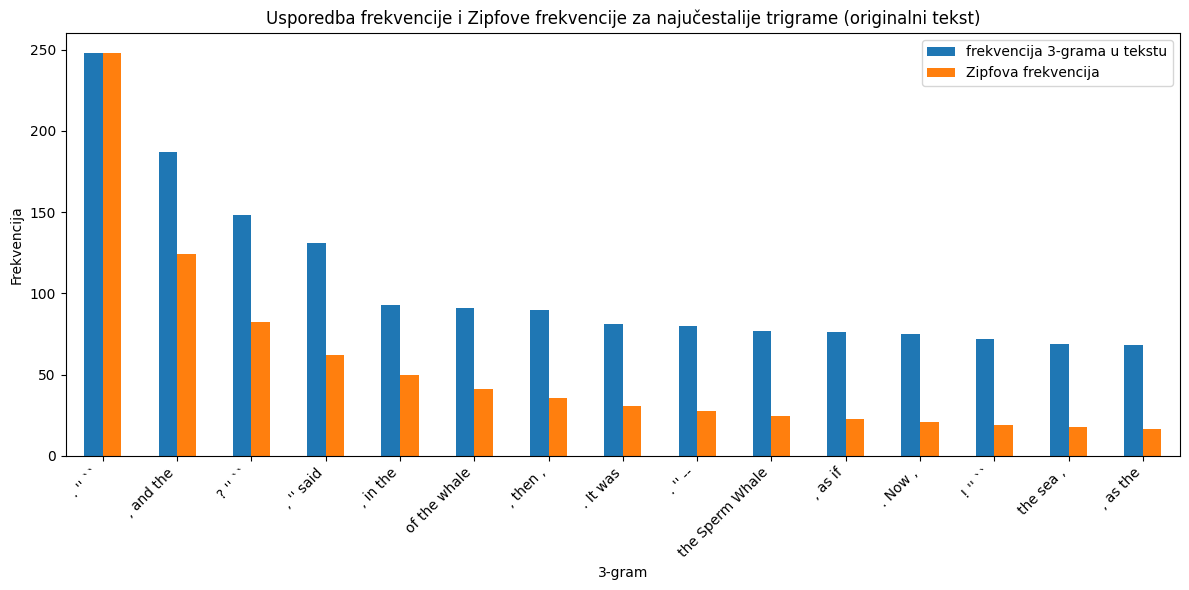

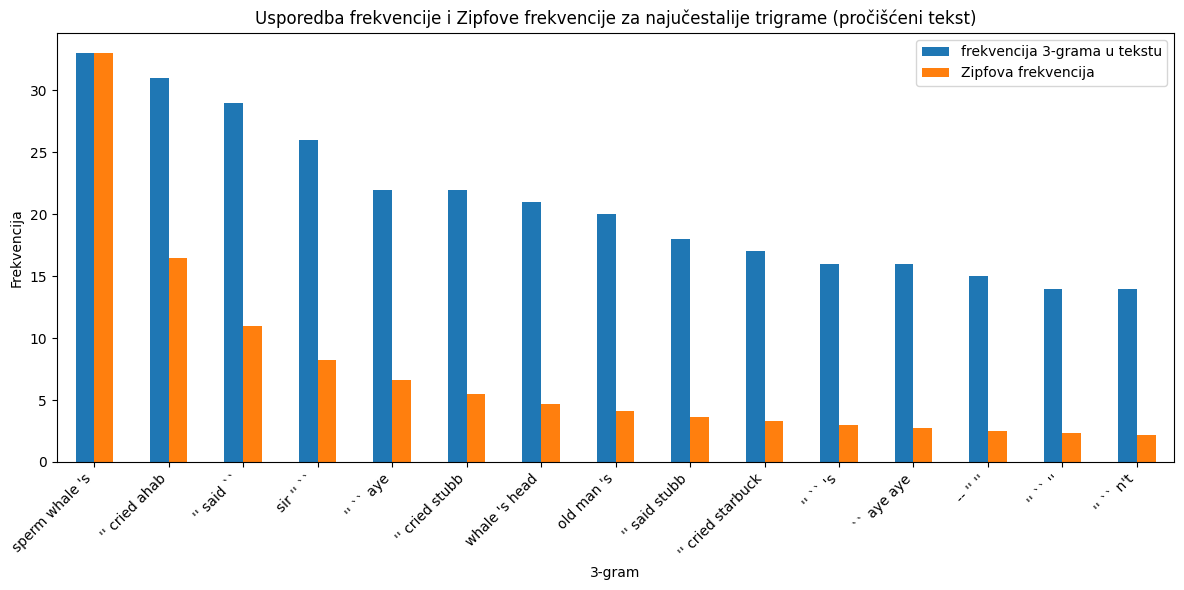

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

original_trigram_data = []
for i, (trigram, frequency) in enumerate(top_15_original_trigrams):
    zipf_frequency = top_15_original_trigrams[0][1] * (1 / (i + 1))
    original_trigram_data.append({'3-gram': ' '.join(trigram), 'frekvencija 3-grama u tekstu': frequency, 'Zipfova frekvencija': zipf_frequency})

df_original = pd.DataFrame(original_trigram_data)

print("DataFrame za najučestalije trigrame (originalni tekst):")
display(df_original)

cleaned_trigram_data = []
for i, (trigram, frequency) in enumerate(top_15_cleaned_trigrams):
    zipf_frequency = top_15_cleaned_trigrams[0][1] * (1 / (i + 1))
    cleaned_trigram_data.append({'3-gram': ' '.join(trigram), 'frekvencija 3-grama u tekstu': frequency, 'Zipfova frekvencija': zipf_frequency})

df_cleaned = pd.DataFrame(cleaned_trigram_data)

print("\nDataFrame za najučestalije trigrame (pročišćeni tekst):")
display(df_cleaned)

df_original.plot(x='3-gram', y=['frekvencija 3-grama u tekstu', 'Zipfova frekvencija'], kind='bar', figsize=(12, 6))
plt.title('Usporedba frekvencije i Zipfove frekvencije za najučestalije trigrame (originalni tekst)')
plt.ylabel('Frekvencija')
plt.xlabel('3-gram')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df_cleaned.plot(x='3-gram', y=['frekvencija 3-grama u tekstu', 'Zipfova frekvencija'], kind='bar', figsize=(12, 6))
plt.title('Usporedba frekvencije i Zipfove frekvencije za najučestalije trigrame (pročišćeni tekst)')
plt.ylabel('Frekvencija')
plt.xlabel('3-gram')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()